In [1]:
# use as template for scope data, etc

In [5]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from numpy import *
import csv
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [6]:
def process_csv(filename, exclude=2):
    exampleFile = open(filename, encoding='utf-8')
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    print(exampleData[1])
    exampleFile.close()
    return exampleData[exclude:]

def get_region_df(df, xcol, offset, halfwidth, noffset=False):
    """ df is a two-column dataframe. return subset of rows zoomed in
        on the region within [offset-halfwidth, offset+halfwidth]. 
    """
    sub_df = df[(df[xcol]>offset-halfwidth) & (df[xcol]<offset+halfwidth)]
    if noffset is True:
        sub_df[xcol] -= offset
    return sub_df

In [7]:
data = process_csv("780Aself_heterodyne_20190412.csv")

['Freq', '', 'Amp', '', 'Freq', '', 'Amp', '', '']


In [8]:
df = DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8
0,87461057,Hz,-98.57,dBm,87461057,Hz,-97.02,dBm,
1,87470771,Hz,-96.50,dBm,87470771,Hz,-97.18,dBm,
2,87480485,Hz,-97.66,dBm,87480485,Hz,-97.61,dBm,
3,87490199,Hz,-96.05,dBm,87490199,Hz,-96.85,dBm,
4,87499913,Hz,-97.72,dBm,87499913,Hz,-97.04,dBm,


In [10]:
# data from the first trace
trace1_df = df[[0,2]].astype(float)
xpts1, ypts1 = trace1_df.values.transpose()
x0 = xpts1[where(ypts1 == max(ypts1))[0]][0]

In [11]:
# data from the second trace
trace2_df = df[[4,6]].astype(float)
xpts2, ypts2 = trace2_df.values.transpose()

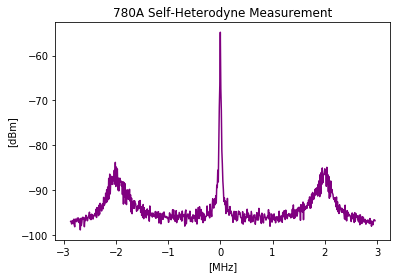

In [14]:
fig,ax = plt.subplots()
ax.set_title("780A Self-Heterodyne Measurement")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.plot((xpts1-x0)/(1e6),ypts1,c="purple") # single frame
ax.plot((xpts2-x0)/(1e6),ypts2,c="purple") # averaged, 20 frames
plt.show()

In [16]:
# zoom in on peak
peak2_df = get_region_df(trace2_df, 4, x0, 5e5)
xptsz, yptsz = peak2_df.values.transpose()

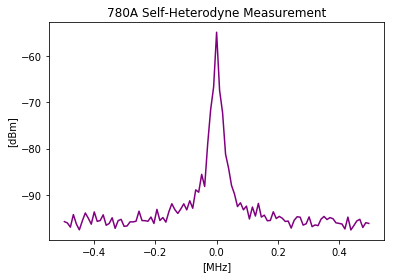

In [17]:
fig,ax = plt.subplots()
ax.set_title("780A Self-Heterodyne Measurement")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
ax.plot((xptsz-x0)/(1e6),yptsz,c="purple") # averaged, 20 frames
plt.show()

In [24]:
# see python-examples\mpl_inset_axes.ipynb to inset the peak